Part -1


Load and Plot Data

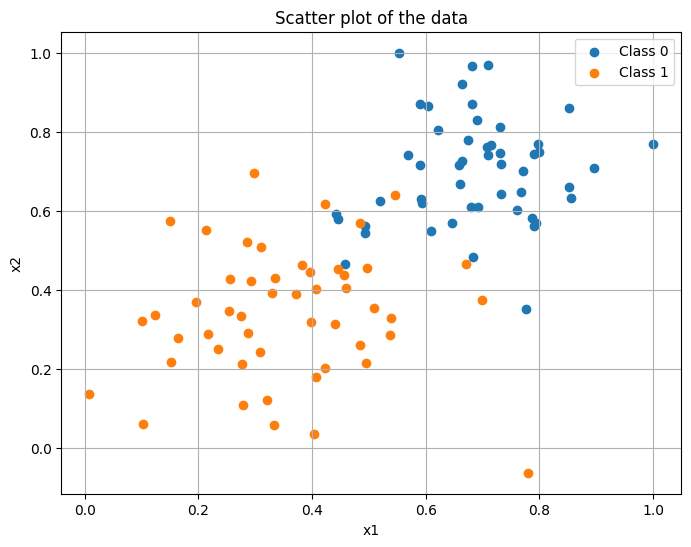

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Shared config
DATA_PATH = Path("/Users/tbz/580_Class/untitled folder/data.csv")
PALETTE = {0: "#1f77b4", 1: "#ff7f0e"}
OUTPUT_DIR = Path("/Users/tbz/580_Class/untitled folder/Assignment_5/figures")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Utilities

def load_data(path: Path = DATA_PATH) -> pd.DataFrame:
    df = pd.read_csv(path, header=None)
    df.columns = ["x1", "x2", "label"]
    return df


def make_features(df: pd.DataFrame):
    X = df[["x1", "x2"]].values
    y = df["label"].values.astype(int)
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]
    return X, y, X_bias


def plot_scatter(df: pd.DataFrame, palette: dict = PALETTE, save_name: str | None = None):
    plt.figure(figsize=(8, 6))
    for label in sorted(df["label"].unique()):
        subset = df[df["label"] == label]
        color = palette.get(int(label), "gray")
        plt.scatter(subset["x1"], subset["x2"], label=f"Class {label}", color=color)
    plt.title("Scatter plot of the data")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.grid(True)
    if save_name:
        plt.savefig(OUTPUT_DIR / save_name, dpi=300, bbox_inches="tight")
    plt.show()


def plot_boundaries(X_bias: np.ndarray, y: np.ndarray, boundaries: list, title: str = "Decision Boundaries", palette: dict = PALETTE, save_name: str | None = None):
    plt.figure(figsize=(8, 6))

    # Scatter
    for label in np.unique(y):
        color = palette.get(int(label), "gray")
        plt.scatter(X_bias[y == label, 1], X_bias[y == label, 2], label=f"Class {label}", color=color)

    # Line x-range from data
    x_min, x_max = X_bias[:, 1].min(), X_bias[:, 1].max()
    padding = 0.05 * (x_max - x_min if x_max > x_min else 1.0)
    x_vals = np.linspace(x_min - padding, x_max + padding, 100)

    # Plot boundaries
    for i, w in enumerate(boundaries):
        y_vals = -(w[0] + w[1] * x_vals) / (w[2] + 1e-12)
        if i == 0:
            plt.plot(x_vals, y_vals, "r-", label="Initial boundary", linewidth=2)
        elif i == len(boundaries) - 1:
            plt.plot(x_vals, y_vals, "k-", label="Final boundary", linewidth=2)
        else:
            plt.plot(x_vals, y_vals, "g--", alpha=0.25)

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    if save_name:
        plt.savefig(OUTPUT_DIR / save_name, dpi=300, bbox_inches="tight")
    plt.show()


def plot_losses(losses: list, title: str = "Log Loss over Epochs", save_name: str | None = None):
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(losses) + 1), losses, marker="o")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.grid(True)
    if save_name:
        plt.savefig(OUTPUT_DIR / save_name, dpi=300, bbox_inches="tight")
    plt.show()

# Load once and make features
df = load_data()
X, y, X_bias = make_features(df)

# Initial visualization
plot_scatter(df, save_name="data_scatter.png")

Implement Perceptron (Heuristic Rule)

In [33]:
def perceptron_mistake_update(X_bias: np.ndarray, y: np.ndarray, learning_rate: float = 0.1, num_epochs: int = 20, random_seed: int = 42):
    """Mistake-driven perceptron training.

    Parameters
    ----------
    X_bias : array (n_samples, 3)
        Features with bias term in column 0.
    y : array (n_samples,)
        Binary labels in {0, 1}.
    learning_rate : float
        Per-update step size.
    num_epochs : int
        Number of passes over the data.
    random_seed : int
        Seed for deterministic initialization.

    Returns
    -------
    boundaries : list[np.ndarray]
        Sequence of weight vectors captured after each update (includes initial and final).
    update_count : int
        Total number of updates performed.
    """
    rng = np.random.default_rng(random_seed)
    weights = rng.normal(size=X_bias.shape[1])
    boundaries = [weights.copy()]
    update_count = 0

    for _ in range(num_epochs):
        for i in range(X_bias.shape[0]):
            activation = X_bias[i] @ weights
            pred = 1 if activation >= 0 else 0
            if pred != y[i]:
                weights += learning_rate * (y[i] - pred) * X_bias[i]
                update_count += 1
                boundaries.append(weights.copy())

    return boundaries, update_count

boundaries, update_count = perceptron_mistake_update(X_bias, y, learning_rate=0.1, num_epochs=20, random_seed=0)
print("Number of updates:", update_count)
print("Initial weights:", boundaries[0])
print("Final weights:", boundaries[-1])

Number of updates: 59
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 0.22573022 -0.27060086 -0.50498825]


Plot the initial separation

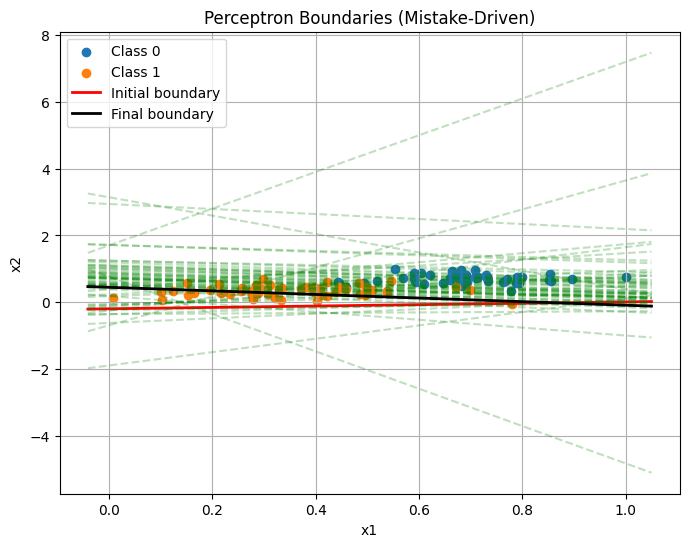

In [34]:
# Reuse unified boundary plotting
plot_boundaries(X_bias, y, boundaries, title="Perceptron Boundaries (Mistake-Driven)", save_name="perceptron_initial_boundary.png")

Learning Rates



Training with learning_rate = 0.01, epochs = 10
Number of updates: 204
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 0.08573022 -0.30801937  0.07093661]


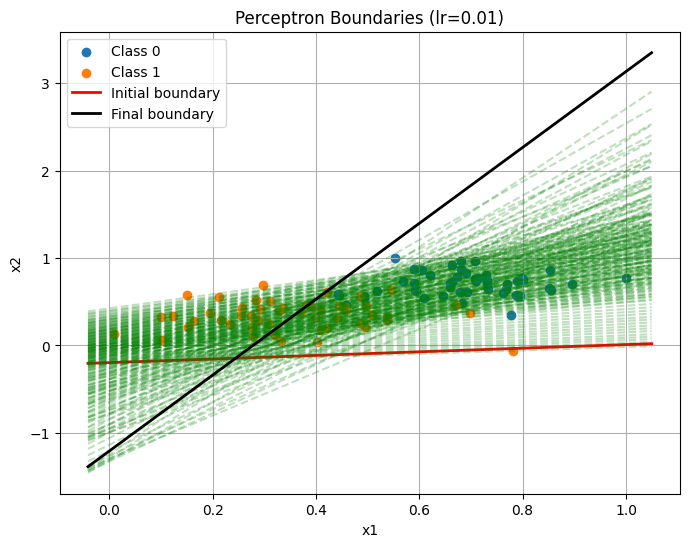


Training with learning_rate = 0.1, epochs = 10
Number of updates: 30
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 0.12573022 -0.16883986 -0.28270635]


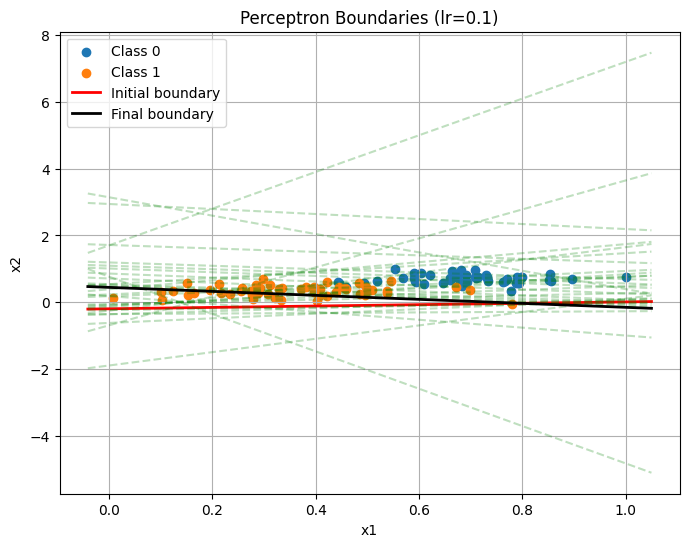


Training with learning_rate = 1.0, epochs = 10
Number of updates: 32
Initial weights: [ 0.12573022 -0.13210486  0.64042265]
Final weights: [ 2.12573022 -1.05648486 -4.68550235]


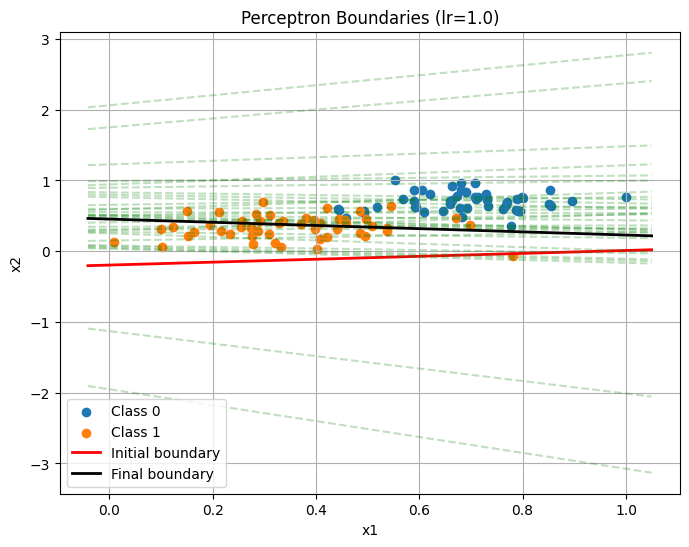

In [35]:
learning_rates = [0.01, 0.1, 1.0]
num_epochs = 10

for lr in learning_rates:
    print(f"\nTraining with learning_rate = {lr}, epochs = {num_epochs}")
    boundaries, update_count = perceptron_mistake_update(X_bias, y, learning_rate=lr, num_epochs=num_epochs, random_seed=0)
    print("Number of updates:", update_count)
    print("Initial weights:", boundaries[0])
    print("Final weights:", boundaries[-1])

    plot_boundaries(X_bias, y, boundaries, title=f"Perceptron Boundaries (lr={lr})", save_name=f"perceptron_boundaries_lr_{lr}.png")

Part- 2

Plot the data

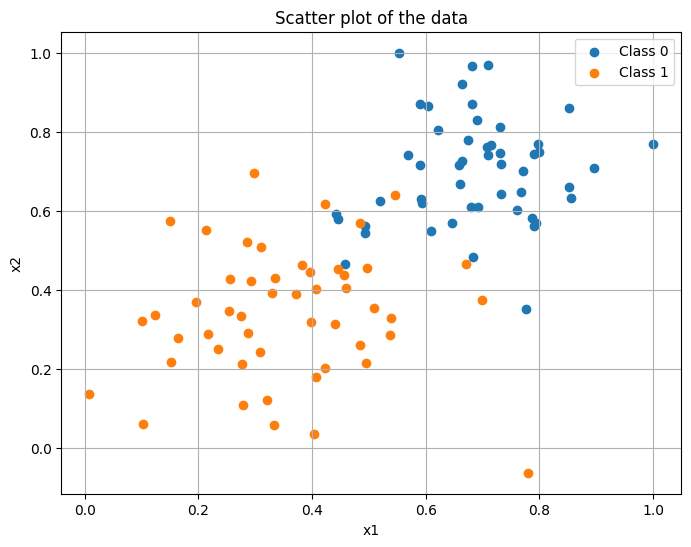

In [36]:
# Reuse loaded data and plotting utilities
plot_scatter(df)

Implement perceptron using the Gradient
Descent

In [37]:
def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))


def logistic_regression_train(
    X_bias: np.ndarray,
    y: np.ndarray,
    learning_rate: float = 0.1,
    num_epochs: int = 100,
    random_seed: int = 42,
    record_every: int = 1,
):
    rng = np.random.default_rng(random_seed)
    weights = rng.normal(size=X_bias.shape[1])
    boundaries = [weights.copy()]
    losses = []

    for epoch in range(num_epochs):
        y_hat = sigmoid(X_bias @ weights)
        error = y_hat - y
        loss = -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))
        losses.append(loss)

        grad = (X_bias.T @ error) / len(y)
        weights -= learning_rate * grad

        if (epoch + 1) % record_every == 0:
            boundaries.append(weights.copy())

    return weights, boundaries, losses

final_weights, boundaries, losses = logistic_regression_train(
    X_bias, y, learning_rate=0.1, num_epochs=100, random_seed=0, record_every=1
)

rounded_weights = [round(float(w), 2) for w in final_weights]
rounded_losses = [round(float(l), 3) for l in losses[:5]]

print("Final weight vector (after 100 epochs):")
print(rounded_weights)
print("\nFirst 5 log loss values (training progress):")
print(rounded_losses)

Final weight vector (after 100 epochs):
[0.3, -0.82, -0.15]

First 5 log loss values (training progress):
[0.761, 0.756, 0.751, 0.747, 0.743]


Plot the initial separation line

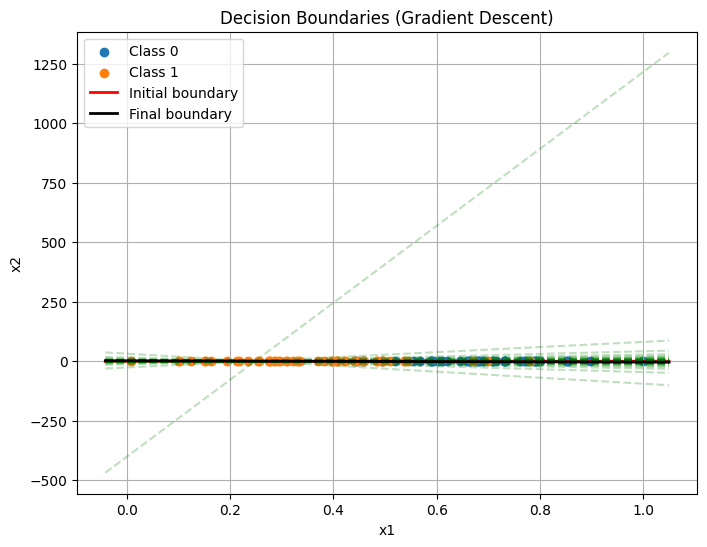

In [38]:
# Use unified boundary plotter and save
plot_boundaries(X_bias, y, boundaries, title="Decision Boundaries (Gradient Descent)", save_name="logistic_boundaries.png")

Compute log loss (error)

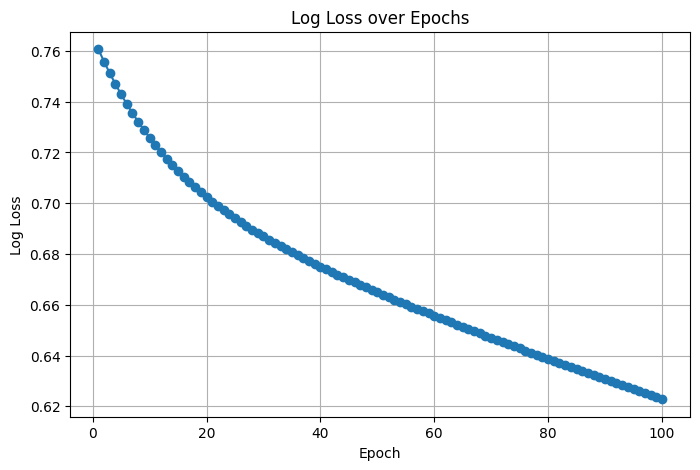

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(losses)+1), losses, marker='o')
plt.title('Log Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()

Learning rate


Training with learning_rate = 0.01, total_epochs = 100
Final weight vector (after training):
[np.float64(0.06), np.float64(-0.25), np.float64(0.51)]
Log loss values every 10 epochs:
[np.float64(0.756), np.float64(0.752), np.float64(0.748), np.float64(0.743), np.float64(0.74), np.float64(0.736), np.float64(0.733), np.float64(0.729), np.float64(0.726), np.float64(0.724)]


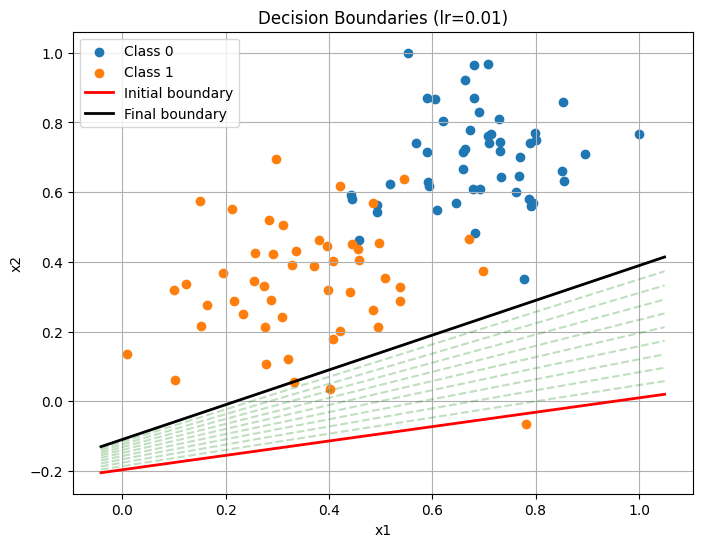

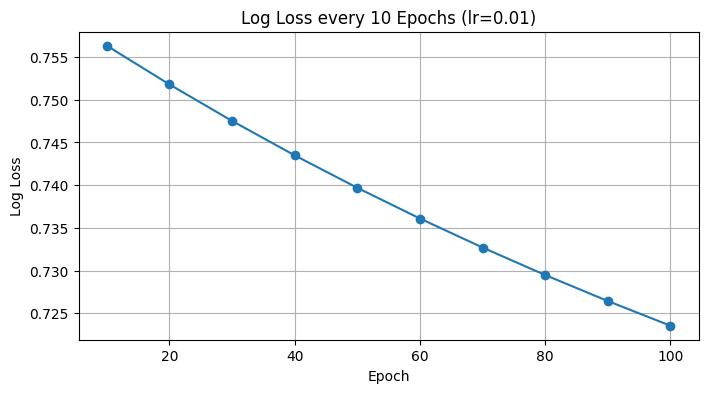


Training with learning_rate = 0.1, total_epochs = 100
Final weight vector (after training):
[np.float64(0.3), np.float64(-0.82), np.float64(-0.15)]
Log loss values every 10 epochs:
[np.float64(0.726), np.float64(0.702), np.float64(0.687), np.float64(0.675), np.float64(0.665), np.float64(0.656), np.float64(0.647), np.float64(0.639), np.float64(0.631), np.float64(0.623)]


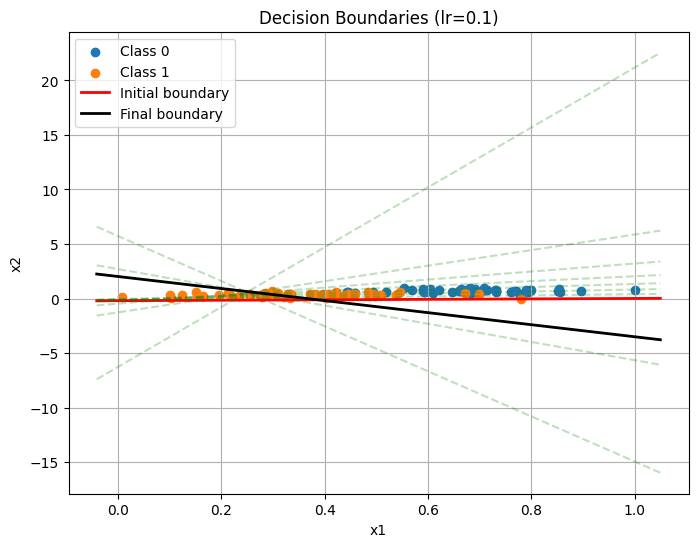

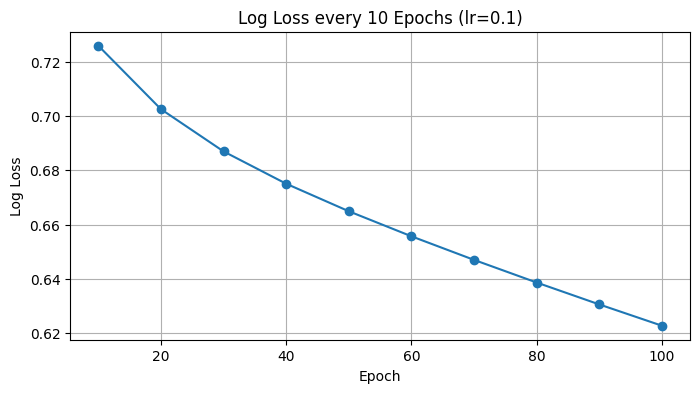


Training with learning_rate = 1.0, total_epochs = 100
Final weight vector (after training):
[np.float64(3.34), np.float64(-3.42), np.float64(-3.2)]
Log loss values every 10 epochs:
[np.float64(0.629), np.float64(0.56), np.float64(0.505), np.float64(0.462), np.float64(0.428), np.float64(0.399), np.float64(0.376), np.float64(0.356), np.float64(0.339), np.float64(0.325)]


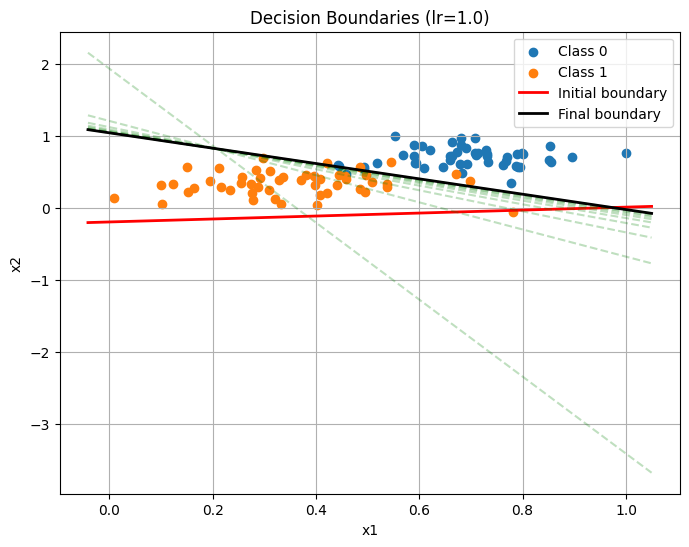

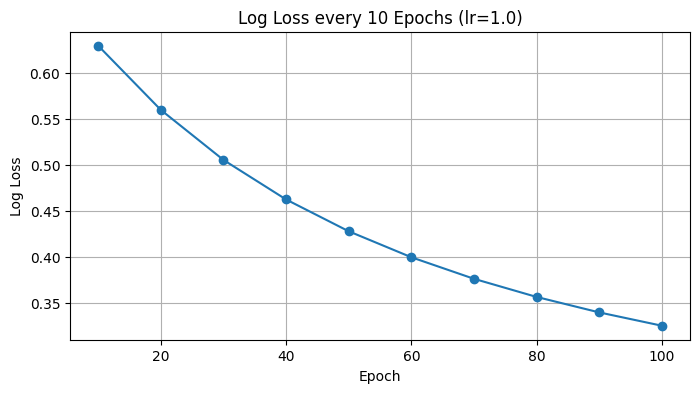

In [40]:
def run_perceptron_every_10_epochs(lr=0.1, total_epochs=100, save_prefix: str | None = None):
    print(f"\nTraining with learning_rate = {lr}, total_epochs = {total_epochs}")

    boundaries = []
    losses_every_10 = []

    rng = np.random.default_rng(0)
    w = rng.normal(size=X_bias.shape[1])
    boundaries.append(w.copy())

    for epoch in range(1, total_epochs + 1):
        y_pred = 1 / (1 + np.exp(-X_bias @ w))
        error = y_pred - y
        gradient = (X_bias.T @ error) / len(y)
        w -= lr * gradient
        boundaries.append(w.copy())

        loss = -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))
        if epoch % 10 == 0:
            losses_every_10.append(loss)

    final_weights = boundaries[-1]
    rounded_weights = [round(wi, 2) for wi in final_weights]

    print("Final weight vector (after training):")
    print(rounded_weights)
    print("Log loss values every 10 epochs:")
    print([round(l, 3) for l in losses_every_10])

    # Plot decision boundaries (every 10 epochs + final)
    boundaries_to_plot = boundaries[::10] + [boundaries[-1]]
    title = f"Decision Boundaries (lr={lr})"
    save_name = f"{save_prefix}_boundaries_lr_{lr}.png" if save_prefix else None
    plot_boundaries(X_bias, y, boundaries_to_plot, title=title, save_name=save_name)

    # Plot loss curve every 10 epochs
    title_loss = f"Log Loss every 10 Epochs (lr={lr})"
    save_name_loss = f"{save_prefix}_loss_every10_lr_{lr}.png" if save_prefix else None
    plt_epochs = list(range(10, total_epochs + 1, 10))
    plt.figure(figsize=(8, 4))
    plt.plot(plt_epochs, losses_every_10, marker='o')
    plt.title(title_loss)
    plt.xlabel("Epoch")
    plt.ylabel("Log Loss")
    plt.grid(True)
    if save_name_loss:
        plt.savefig(OUTPUT_DIR / save_name_loss, dpi=300, bbox_inches='tight')
    plt.show()

run_perceptron_every_10_epochs(lr=0.01, total_epochs=100, save_prefix="gd")
run_perceptron_every_10_epochs(lr=0.1, total_epochs=100, save_prefix="gd")
run_perceptron_every_10_epochs(lr=1.0, total_epochs=100, save_prefix="gd")

# Assignment 5 Report (Detailed)

GitHub: `https://github.com/tabrez05/CSCI580.git`

This report documents the complete workflow, algorithms, experiments, and findings for both the heuristic perceptron and the gradient-descent (logistic) perceptron. All referenced figures are saved under `Assignment_5/figures`.

---

## Dataset and Visualization
- Source: `data.csv` with columns `x1`, `x2`, `label` (binary 0/1).
- Feature construction: a bias term is prepended so that each input is \(x = [1, x_1, x_2]^T\).
- Scatter colors: **Class 0 = blue**, **Class 1 = orange**.
- Figure: `data_scatter.png`.

The scatter plot shows two well-separated clusters, suggesting a linear separator should work.

---

## Part 1 — Heuristic Perceptron (Mistake-Driven Updates)

### Algorithm
- Prediction: \(\hat y = \mathbb{1}[w^T x \ge 0]\).
- Update on mistakes only: \(w \leftarrow w + \eta (y - \hat y) x\).
- We capture the weight vector after every update to visualize boundary evolution.

### Baseline Run
- Function: `perceptron_mistake_update` with `learning_rate=0.1`, `num_epochs=20`, `random_seed=0`.
- Results:
  - Number of updates: **59**
  - Initial weights ≈ **[0.126, -0.132, 0.640]**
  - Final weights ≈ **[0.226, -0.271, -0.505]**
- Figure (colors required by the prompt):
  - Initial boundary: **red (solid)**
  - Intermediate boundaries: **green (dashed)**
  - Final boundary: **black (solid)**
  - File: `perceptron_initial_boundary.png`

### Learning Rate Study (epochs=10)
- Settings: `lr ∈ {0.01, 0.1, 1.0}` with deterministic init.
- Update counts observed:
  - `lr=0.01` → **204** updates → `perceptron_boundaries_lr_0.01.png`
  - `lr=0.1`  → **30**  updates → `perceptron_boundaries_lr_0.1.png`
  - `lr=1.0`  → **32**  updates → `perceptron_boundaries_lr_1.0.png`

Interpretation:
- Small \(\eta\) learns conservatively and needs many updates; boundaries progress smoothly but slowly.
- \(\eta=0.1\) offers a strong balance—quick convergence with stable boundary movement.
- Large \(\eta\) produces bigger steps; it can converge fast but may look less stable between iterations.

---

## Part 2 — Gradient Descent Perceptron (Logistic Regression)

### Model and Objective
- Probabilistic model: \(\hat y = \sigma(X w)\), \(\sigma(z)=1/(1+e^{-z})\).
- Loss (average log loss):
  \[\mathcal{L}(w) = -\frac{1}{N}\sum_{i=1}^{N}\big[y_i\log \hat y_i + (1-y_i)\log(1-\hat y_i)\big].\]
- Gradient: \(\nabla \mathcal{L}(w) = \frac{1}{N} X^T(\hat y - y)\).
- Update: \(w \leftarrow w - \eta\, \nabla \mathcal{L}(w)\).

### Training Configuration and Outputs
- Function: `logistic_regression_train` with `learning_rate=0.1`, `num_epochs=100`, `random_seed=0`, `record_every=1`.
- Final weights (rounded): **[0.30, -0.82, -0.15]**.
- First 5 losses (rounded): **[0.761, 0.756, 0.751, 0.747, 0.743]**.

### Boundary Evolution and Error Curve
- Boundary figure (`logistic_boundaries.png`) uses the same color convention:
  - Initial red (solid), intermediate dashed green, final black (solid).
- Per‑epoch loss curve (`log_loss_epochs.png`) shows a steady downward trend over 100 epochs.

### Learning Rate Study (loss every 10 epochs)
- `lr=0.01`: **[0.756, 0.752, 0.748, 0.743, 0.740, 0.736, 0.733, 0.729, 0.726, 0.724]**
- `lr=0.1`:  **[0.726, 0.702, 0.687, 0.675, 0.665, 0.656, 0.647, 0.639, 0.631, 0.623]**
- `lr=1.0`:  **[0.629, 0.560, 0.505, 0.462, 0.428, 0.399, 0.376, 0.356, 0.339, 0.325]**
- Figures: `gd_boundaries_lr_*.png` and `gd_loss_every10_lr_*.png`.

Interpretation:
- All rates reduce loss; larger \(\eta\) descends faster but takes bigger parameter steps.
- On this dataset, `lr=0.1` again balances speed and stability well.

---

## Conclusions
- The dataset is linearly separable; both algorithms find good separators.
- Heuristic perceptron learns via mistake-driven updates; the path of boundaries explains how each misclassification nudges the line.
- Logistic (GD) provides a smooth, probabilistic fit that minimizes log loss; its error curves confirm consistent improvement.
- Across methods, **`learning_rate=0.1`** is the most reliable trade‑off between convergence speed and stability.

## Figures (saved)
- `data_scatter.png`
- `perceptron_initial_boundary.png`, `perceptron_boundaries_lr_{0.01,0.1,1.0}.png`
- `logistic_boundaries.png`, `log_loss_epochs.png`
- `gd_boundaries_lr_{0.01,0.1,1.0}.png`, `gd_loss_every10_lr_{0.01,0.1,1.0}.png`

